In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("spacy_train_data_1000.csv")
data.head(15)

,ID,summaries,exact_matched_patt_contextual,summaries_matching,Tech_from_string_match,spacy_format_v1,exact_matched_patt,matched_NER_final,spacy_format_manual_tag
0,zu5V5tz7VR1S1B7AWZ9cbA_0000,"[""currently employed as a trading agreements s...",['clearstream'],"[""currently employed as a trading agreements s...","['ace', 'alis', 'atera', 'cat', 'clearstream',...","[[905, 916, 'ORG']]","['keeping', 'hired', 'clearstream', 'terms', '...",[],"(""currently employed as a trading agreements s..."
1,zrwYrLdOpaOaeInRdGNGuQ_0000,['experienced material scientist with expertis...,['western digital'],['experienced material scientist with expertis...,"['ami', 'and co', 'blis', 'bric', 'bric', 'cat...","[[1442, 1457, 'ORG']]","['polymer', 'fluent', 'devoted', 'western digi...",[],('experienced material scientist with expertis...
2,zkBVW33f66ZcDCZIV9UaNg_0000,['a varied experience set from working in a la...,"['microsoft office', 'adobe']",['a varied experience set from working in a la...,"['adobe', 'adobe illustrator', 'adobe indesign...","[[609, 614, 'ORG'], [542, 558, 'ORG']]","['microsoft office', 'adobe', 'october']",[],('a varied experience set from working in a la...
3,zhYBF2y27LTSykBxobls2Q_0000,"[""i am a client-facing interior designer & pro...",['crd'],"[""i am a client-facing interior designer & pro...","['cat', 'certain', 'cien', 'construct', 'conti...","[[2068, 2071, 'ORG']]","['turn', 'certain', 'foundation', 'fluid', 'crd']",[],"(""i am a client-facing interior designer & pro..."
4,zcm4dUdKSBYNBshXRUPI9g_0000,"[""motivated, organised, efficient and hardwork...",['accenture'],"[""motivated, organised, efficient and hardwork...","['accenture', 'ada', 'alongside', 'apt', 'blis...","[[1264, 1273, 'ORG']]","['tackle', 'grow', 'seek', 'alongside', 'accen...",[],"(""motivated, organised, efficient and hardwork..."
5,zcYz8XMzVGIlrwJBKnNYTw_0000,"[""i'm a high school student who enjoys latest ...","['wordpress', 'android', 'python', 'django', '...","[""i'm a high school student who enjoys latest ...","['alis', 'android', 'ark', 'blis', 'cat', 'cie...","[[602, 609, 'ORG'], [1726, 1732, 'ORG'], [612,...","['run', 'engage', 'wordpress', 'android', 'ios...",[],"(""i'm a high school student who enjoys latest ..."
6,zab8O8Zg9mwcd5HvcdRVGw_0000,"['i am a senior consultant at aquis search, pr...","['microsoft office', 'intel']","['i am a senior consultant at aquis search, pr...","['alis', 'ark', 'built', 'candid', 'cat', 'con...","[[1107, 1112, 'ORG'], [1023, 1039, 'ORG']]","['built', 'microsoft office', 'intel']",[],"('i am a senior consultant at aquis search, pr..."
7,zYOI4JmmTDiT023cU9g7XA_0000,['having spent 8 months in 2011 working with d...,['rsm'],['having spent 8 months in 2011 working with d...,"['ace', 'alis', 'and co', 'cat', 'emplo', 'eve...","[[678, 681, 'ORG']]","['spent', 'paid', 'rsm']",[],('having spent 8 months in 2011 working with d...
8,zXjhtGcZ3oXxPWDYCHJe7w_0000,"[""i'm a nature-loving world traveler with the ...","['accenture', 'jobcase']","[""i'm a nature-loving world traveler with the ...","['accenture', 'ark', 'capabiliti', 'chai', 'ch...","[[936, 945, 'ORG'], [1143, 1150, 'ORG']]","['insights', 'check', 'link', 'roadmap', 'grow...",[],"(""i'm a nature-loving world traveler with the ..."
9,zSy3NGI4X9G2ldGMrz43hw_0000,['-15 years combined bpo experience in collect...,['upstream'],['-15 years combined bpo experience in collect...,"['collection pro', 'combin', 'grow', 'ics', 'i...","[[355, 363, 'ORG']]",['upstream'],[],('-15 years combined bpo experience in collect...


In [3]:
data=data.iloc[:,:3]

In [4]:
data.head()

,ID,summaries,exact_matched_patt_contextual
0,zu5V5tz7VR1S1B7AWZ9cbA_0000,"[""currently employed as a trading agreements s...",['clearstream']
1,zrwYrLdOpaOaeInRdGNGuQ_0000,['experienced material scientist with expertis...,['western digital']
2,zkBVW33f66ZcDCZIV9UaNg_0000,['a varied experience set from working in a la...,"['microsoft office', 'adobe']"
3,zhYBF2y27LTSykBxobls2Q_0000,"[""i am a client-facing interior designer & pro...",['crd']
4,zcm4dUdKSBYNBshXRUPI9g_0000,"[""motivated, organised, efficient and hardwork...",['accenture']


In [5]:
#replacing null vals with empty list
data['exact_matched_patt_contextual'] = [ [] if x is np.NaN else x for x in data['exact_matched_patt_contextual'] ]


In [6]:
import nltk
import re
from bs4 import BeautifulSoup

nltk.download("punkt")

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    return text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohitbagaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# for i, l in enumerate(data["exact_matched_patt_contextual"]):
#  print("list",i,"is",type(l))

In [9]:
data['exact_matched_patt_contextual']=data['exact_matched_patt_contextual'].astype(str)

# for i, l in enumerate(data["exact_matched_patt_contextual"]):
#  print("list",i,"is",type(l))

# data.head(15)

data["exact_matched_patt_contextual"] = data["exact_matched_patt_contextual"].apply(eval)

tech_dict = {}
for i in data['exact_matched_patt_contextual']:
    for j in i:
        if j not in tech_dict:
            tech_dict[j] = 1
        else:
            tech_dict[j] += 1

# tech_dict

tech_list=[]
tech_multi_words=[]
for i in tech_dict:
    if ((' ' in i) == True):
        tech_multi_words.append(i)
    else:
        tech_list.append(i)

In [13]:
# tech_multi_words[:5]

In [14]:
# tech_list[:5]

In [15]:
# len(tech_list) , len(tech_multi_words)

In [12]:
data["summaries"]=data["summaries"].apply(clean_text)

In [13]:
def convert(lst):
	return ' '.join(lst).split()

In [18]:
# for i in tech_multi_words:
#     print(i)

In [14]:
def in_techwords(sentence):
    final_list=[]
    tag_col=[]
    broken_list = convert([sentence]) 
    for i in tech_multi_words: #iterating through mutliple word list
        if i in sentence: #if found in sentence
            listofwords = convert([i])# ['microsoft','office']
            f=True
            for k in listofwords:
                curr_tag="I"
                if(f):
                    curr_tag="B"
                    f=False
                final_list.append(k)
                tag_col.append(curr_tag)
                try:
                    broken_list.remove(k)
                except:
                    print(k)
#                     print(sentence)
#                     print("An exception occurred")
#                     for i in broken_list:
#                         print(i)
    tech_words=tech_list
    for word in broken_list:
        curr_tag="O" 
        if word in tech_words:
                curr_tag='B'
        tag_col.append(curr_tag) #adding tag
        final_list.append(word)
    tag_col.append(None) #adding blank
    final_list.append(None)#adding blank
    return pd.DataFrame(list(zip(final_list, tag_col)),columns =['Word', 'Tag'])

In [15]:
final_data=pd.DataFrame()

for i in range(0,len(data)):
    temp = in_techwords(data["summaries"][i])
    length = len(temp)
    wordd="Sentence :"+str(i+1) #sentence no.
    a=[wordd]*length
    temp.insert(0,"Sentence #",a)
    final_data = final_data.append(temp, ignore_index=True) #appending sentences in the required format

2008
g
ibm
xenapp
i
google
g
microsoft
autodesk
autodesk
microsoft
windows
7


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


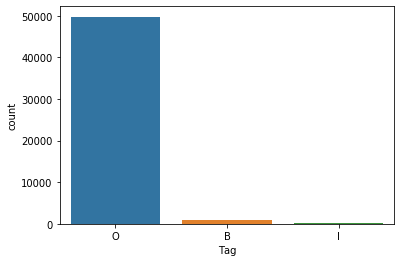

In [27]:
import seaborn as sns
sns.countplot(final_data['Tag'])

In [17]:
final_data['Tag'].value_counts()

O    258317
B      6072
I       541
Name: Tag, dtype: int64

In [18]:
df=final_data
df.loc[(df['Tag'] == 'B'), 'Tag'] = 'B-ORG'
df.loc[(df['Tag'] == 'I'), 'Tag'] = 'I-ORG'
# df.to_csv("BIO_taggingdata_ALL_Spacy_TRAIN.csv",index=False)

In [19]:
# def in_techwords_B(sentence):
#     final_list=[]
#     tag_col=[]
#     got_b=False
#     broken_list = convert([sentence]) 
#     for i in tech_multi_words: #iterating through mutliple word list
#         if i in sentence: #if found in sentence
#             got_b=True
#             listofwords = convert([i])# ['microsoft','office']
#             f=True
#             for k in listofwords:
#                 curr_tag="I"
#                 if(f):
#                     curr_tag="B"
#                     f=False
#                 final_list.append(k)
#                 tag_col.append(curr_tag)
#                 try:
#                     broken_list.remove(k)
#                 except:
#                     print(k)
# #                     print(sentence)
# #                     print("An exception occurred")
# #                     for i in broken_list:
# #                         print(i)
#     tech_words=tech_list
#     for word in broken_list:
#         curr_tag="O" 
#         if word in tech_words:
#                 curr_tag='B'
#                 got_b=True
#         tag_col.append(curr_tag) #adding tag
#         final_list.append(word)
#     tag_col.append(None)
#     final_list.append(None)
#     return pd.DataFrame(list(zip(final_list, tag_col)),columns =['Word', 'Tag']),got_b

# final_data2=pd.DataFrame()

# for i in range(0,len(data)):
#     temp,flag = in_techwords_B(data["summaries"][i])
#     length = len(temp)
#     wordd="Sentence :"+str(i+1) #sentence no.
#     a=[wordd]*(length-1)
#     a.append(None)
#     temp.insert(0,"Sentence #",a)
#     if flag==True:
#         final_data2 = final_data2.append(temp, ignore_index=True) #appending sentences in the required format

# final_data2["Tag"].value_counts()

# df=final_data2
# df.loc[(df['Tag'] == 'B'), 'Tag'] = 'B-ORG'
# df.loc[(df['Tag'] == 'I'), 'Tag'] = 'I-ORG'
# df.to_csv("BIO_taggingdata_B_MUST.csv",index=False)

In [22]:
data=pd.read_csv("spacy_test_data_189.csv")
data.head(15)

,ID,summaries,exact_matched_patt_contextual,summaries_matching,Tech_from_string_match,spacy_format_v1,exact_matched_patt,matched_NER_final,spacy_format_manual_tag
0,8ndhZBQs0dZ0ye0knHLmaQ_0000,['i will accept all requests to connect. i hav...,"['vertica', 'vb.net', 'informatica', 'java', '...",['i will accept all requests to connect. i hav...,"['accept', 'ace', 'acl', 'air', 'alis', 'amp',...","[[915, 926, 'ORG'], [937, 941, 'ORG'], [928, 9...","['accept', 'connect', 'vertica', 'vb.net', 'in...",[],('i will accept all requests to connect. i hav...
1,8nS3Y5jolvkqg3DM5GCi7A_0000,"[""is your company leveraging technology to inc...",['ios'],"[""is your company leveraging technology to inc...","['ace', 'acl', 'ava', 'chai', 'cien', 'ease', ...","[[1467, 1470, 'ORG']]","['integrate', 'ios']",[],"(""is your company leveraging technology to inc..."
2,8hxEcLBmf6FkYIwb0N3qCA_0000,['architect and developer specialising in the ...,"['microsoft dynamics', 'microsoft.net', 'andro...",['architect and developer specialising in the ...,"['alis', 'ami', 'android', 'built', 'cat', 'd ...","[[639, 646, 'ORG'], [89, 107, 'ORG'], [125, 13...","['built', 'microsoft dynamics', 'microsoft.net...",[],('architect and developer specialising in the ...
3,8go4mNkO9BMUs-OOQkoKzQ_0000,['result oriented and self motivated digital m...,['sokrati'],['result oriented and self motivated digital m...,"['ace', 'ark', 'digital marketer', 'ets', 'gro...","[[2685, 2692, 'ORG']]","['digital marketer', 'sokrati']",[],('result oriented and self motivated digital m...
4,8XFOXd4YT0LhvmPQcMhHoA_0000,['organizational & cooperate culture change is...,"['microsoft excel', 'microsoft word', 'beacon']",['organizational & cooperate culture change is...,"['accountable', 'air', 'ami', 'ark', 'beacon',...","[[627, 633, 'ORG'], [184, 199, 'ORG'], [201, 2...","['microsoft excel', 'microsoft word', 'sigma',...",[],('organizational & cooperate culture change is...
5,8Vu3fjBmwkdYihFNw3ezSw_0000,['i am an entrepreneurial minded sales profess...,['gmail'],['i am an entrepreneurial minded sales profess...,"['alis', 'aps', 'cien', 'devi', 'dot', 'gmail'...","[[1466, 1471, 'ORG']]","['gmail', 'dot', 'aps']",[],('i am an entrepreneurial minded sales profess...
6,8VAflflB8ib7bU1ROlYAnw_0000,"['creative, innovative and highly productive e...",['azure'],"['creative, innovative and highly productive e...","['2nd watch', 'aps', 'ark', 'azure', 'bridge',...","[[495, 500, 'ORG']]","['productive', 'azure', '2nd watch', 'bridge']",[],"('creative, innovative and highly productive e..."
7,8ScgaCDJqmQ719Tm8CVv5w_0000,"[""i can shepherd any video project from outlin...",['hawk'],"[""i can shepherd any video project from outlin...","['amp', 'and co', 'ark', 'cat', 'countr', 'doz...","[[304, 308, 'ORG']]","['turn', 'hawk', 'premier']",[],"(""i can shepherd any video project from outlin..."
8,8Pjx-XW3hipbxIdGGH2kmg_0000,['for the last 8 years i have mainly been work...,['turbine'],['for the last 8 years i have mainly been work...,"['and co', 'ava', 'certain', 'ease', 'here', '...","[[65, 72, 'ORG']]","['certain', 'turbine']",[],('for the last 8 years i have mainly been work...
9,8Gbl6F78daIXBq7WGz-MWA_0000,['contact me today: 254-716-1394 | email: cons...,['gmail'],['contact me today: 254-716-1394 | email: cons...,"['ark', 'cien', 'daily', 'ease', 'format', 'fu...","[[61, 66, 'ORG']]","['gmail', 'daily', 'funnel']",[],('contact me today: 254-716-1394 | email: cons...


In [23]:
data=data.iloc[:,:3]
data.head()

,ID,summaries,exact_matched_patt_contextual
0,8ndhZBQs0dZ0ye0knHLmaQ_0000,['i will accept all requests to connect. i hav...,"['vertica', 'vb.net', 'informatica', 'java', '..."
1,8nS3Y5jolvkqg3DM5GCi7A_0000,"[""is your company leveraging technology to inc...",['ios']
2,8hxEcLBmf6FkYIwb0N3qCA_0000,['architect and developer specialising in the ...,"['microsoft dynamics', 'microsoft.net', 'andro..."
3,8go4mNkO9BMUs-OOQkoKzQ_0000,['result oriented and self motivated digital m...,['sokrati']
4,8XFOXd4YT0LhvmPQcMhHoA_0000,['organizational & cooperate culture change is...,"['microsoft excel', 'microsoft word', 'beacon']"


In [24]:
data["summaries"]=data["summaries"].apply(clean_text)

In [25]:
data['exact_matched_patt_contextual']=data['exact_matched_patt_contextual'].astype(str)

# for i, l in enumerate(data["exact_matched_patt_contextual"]):
#  print("list",i,"is",type(l))

# data.head(15)

data["exact_matched_patt_contextual"] = data["exact_matched_patt_contextual"].apply(eval)

tech_dict = {}
for i in data['exact_matched_patt_contextual']:
    for j in i:
        if j not in tech_dict:
            tech_dict[j] = 1
        else:
            tech_dict[j] += 1

# tech_dict

tech_list=[]
tech_multi_words=[]
for i in tech_dict:
    if ((' ' in i) == True):
        tech_multi_words.append(i)
    else:
        tech_list.append(i)

In [26]:
final_data=pd.DataFrame()

for i in range(0,len(data)):
    temp = in_techwords(data["summaries"][i])
    length = len(temp)
    wordd="Sentence :"+str(i+1) #sentence no.
    a=[wordd]*length
    temp.insert(0,"Sentence #",a)
    final_data = final_data.append(temp, ignore_index=True) #appending sentences in the required format

2012


In [28]:
final_data['Tag'].value_counts()

O    49795
B     1018
I      116
Name: Tag, dtype: int64

In [29]:
df=final_data
df.loc[(df['Tag'] == 'B'), 'Tag'] = 'B-ORG'
df.loc[(df['Tag'] == 'I'), 'Tag'] = 'I-ORG'
df.to_csv("BIO_taggingdata_ALL_Spacy_TEST.csv",index=False)